In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cProfile import label #?not sure

In [36]:
#removing space after authors 
def fix_author(row):
    if not isinstance(row, str) or row[-1] != ' ':
        return row
    return row[:-1]

In [37]:
#This is path to output csv files of the index of each book with they italicized names filtered out
vol1_path = '../input/index_without_itallics_csvs/vol1/vol1_index_pruned.csv'
vol2_path = '../input/index_without_itallics_csvs/vol2/vol2_index_pruned.csv'
vol3_path = '../input/index_without_itallics_csvs/vol3/vol3_index_pruned.csv'

vol1_df = pd.read_csv(vol1_path)
vol2_df = pd.read_csv(vol2_path)
vol3_df = pd.read_csv(vol3_path)

#fix spacing issue
vol1_df['author'] = vol1_df['author'].apply(fix_author)
vol2_df['author'] = vol2_df['author'].apply(fix_author)
vol3_df['author'] = vol3_df['author'].apply(fix_author)

#changing name of columns 
vol1_df.rename(columns={'genus': 'mouterde_genus', 'epithet': 'mouterde_epithet', 'author':'mouterde_author', 'infra':'mouterde_infra'}, inplace=True)
vol2_df.rename(columns={'genus': 'mouterde_genus', 'epithet': 'mouterde_epithet', 'author':'mouterde_author', 'infra':'mouterde_infra'}, inplace=True)
vol3_df.rename(columns={'genus': 'mouterde_genus', 'epithet': 'mouterde_epithet', 'author':'mouterde_author', 'infra':'mouterde_infra'}, inplace=True)

#wcvp 
text_wcvp_path = '../input/wcvp/wcvp_v9_jun_2022.txt'
wcvp_df = pd.read_csv(text_wcvp_path, sep = '|')

# PlayGround

In [38]:
vol1_df

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank
0,616,Acanthophyllum,NaN,NaN,NaN,genus
1,616,Acanthophyllum,kurdicum,NaN,Boiss. et Hausskn.,species
2,616,Achyranthes,NaN,NaN,NaN,genus
3,616,Achyranthes,aspera,NaN,L.,species
4,616,Adiantum,NaN,NaN,NaN,genus
...,...,...,...,...,...,...
1382,638,Vulpia,uniglumis,NaN,(Sol.) Dumort.,species
1383,638,Zannichellia,NaN,NaN,NaN,genus
1384,638,Zannichellia,palustris,NaN,L.,species
1385,638,Zostera,NaN,NaN,NaN,genus


In [39]:
#concat all index volumes into one #not sure if this is a good idea or bad one should check runtime ... will deal with it later :D

In [40]:
vol1_df

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank
0,616,Acanthophyllum,NaN,NaN,NaN,genus
1,616,Acanthophyllum,kurdicum,NaN,Boiss. et Hausskn.,species
2,616,Achyranthes,NaN,NaN,NaN,genus
3,616,Achyranthes,aspera,NaN,L.,species
4,616,Adiantum,NaN,NaN,NaN,genus
...,...,...,...,...,...,...
1382,638,Vulpia,uniglumis,NaN,(Sol.) Dumort.,species
1383,638,Zannichellia,NaN,NaN,NaN,genus
1384,638,Zannichellia,palustris,NaN,L.,species
1385,638,Zostera,NaN,NaN,NaN,genus


In [41]:
new_df = pd.merge(vol1_df, wcvp_df,  how='left', left_on=['mouterde_genus','mouterde_epithet'], right_on = ['genus','species'])

In [42]:
new_df.shape

(5122, 24)

In [43]:
new_df.iloc[:,:17]

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank,kew_id,family,genus,species,infraspecies,taxon_name,authors,rank,taxonomic_status,accepted_kew_id,accepted_name
0,616,Acanthophyllum,NaN,NaN,NaN,genus,7385-1,Asteraceae,Acanthophyllum,NaN,NaN,Acanthophyllum,Hook. & Arn.,GENUS,Synonym,10161-1,Nassauvia
1,616,Acanthophyllum,NaN,NaN,NaN,genus,6156-1,Caryophyllaceae,Acanthophyllum,NaN,NaN,Acanthophyllum,C.A.Mey.,GENUS,Accepted,NaN,NaN
2,616,Acanthophyllum,kurdicum,NaN,Boiss. et Hausskn.,species,150248-1,Caryophyllaceae,Acanthophyllum,kurdicum,NaN,Acanthophyllum kurdicum,Boiss. & Hausskn.,SPECIES,Synonym,150226-1,Acanthophyllum crassifolium
3,616,Achyranthes,NaN,NaN,NaN,genus,327359-2,Amaranthaceae,Achyranthes,NaN,NaN,Achyranthes,L.,GENUS,Accepted,NaN,NaN
4,616,Achyranthes,aspera,NaN,L.,species,2468-2,Amaranthaceae,Achyranthes,aspera,NaN,Achyranthes aspera,L.,SPECIES,Accepted,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,638,Zannichellia,palustris,NaN,L.,species,77255740-1,Potamogetonaceae,Zannichellia,palustris,repens,Zannichellia palustris subsp. repens,(Boenn.) Schübl. & G.Martens,SUBSPECIES,Synonym,77170965-1,Zannichellia palustris subsp. palustris
5118,638,Zannichellia,palustris,NaN,L.,species,77255245-1,Potamogetonaceae,Zannichellia,palustris,rosenii,Zannichellia palustris subsp. rosenii,(Wallman) K.Richt.,SUBSPECIES,Synonym,77170965-1,Zannichellia palustris subsp. palustris
5119,638,Zannichellia,palustris,NaN,L.,species,77256049-1,Potamogetonaceae,Zannichellia,palustris,tenuis,Zannichellia palustris subsp. tenuis,(Reut.) Nyman,SUBSPECIES,Synonym,77170965-1,Zannichellia palustris subsp. palustris
5120,638,Zostera,NaN,NaN,NaN,genus,27873-1,Zosteraceae,Zostera,NaN,NaN,Zostera,L.,GENUS,Accepted,NaN,NaN


In [44]:
# excluding infra as vol1 doesn't have infra species (need to figure out how to deal with null values here) 
# Need to drop genus only entries as we don't have genus author for volumes 1 and 2 and can't match them with correct author 

no_genus_only_no_infra_vol1_df = vol1_df[~((vol1_df['mouterde_epithet']).isnull()) & ((vol1_df['mouterde_infra']).isnull())] 
no_infra_wcvp_df = wcvp_df[(wcvp_df['infraspecies']).isnull()]
species_only_df = pd.merge(no_genus_only_no_infra_vol1_df, no_infra_wcvp_df,  how='inner', 
                            left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author'], 
                            right_on = ['genus','species', 'authors'])

In [45]:
species_only_df['authors'][0]

'L.'

In [46]:
species_only_df['mouterde_author'][0]

'L.'

In [47]:
species_only_df.iloc[:,5:20]

,taxon rank,kew_id,family,genus,species,infraspecies,taxon_name,authors,rank,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name
0,species,2468-2,Amaranthaceae,Achyranthes,aspera,NaN,Achyranthes aspera,L.,SPECIES,Accepted,NaN,NaN,NaN,327359-2,Achyranthes
1,species,325030-2,Pteridaceae,Adiantum,capillus-veneris,NaN,Adiantum capillus-veneris,L.,SPECIES,Accepted,NaN,NaN,NaN,328214-2,Adiantum
2,species,384562-1,Poaceae,Aegilops,biuncialis,NaN,Aegilops biuncialis,Vis.,SPECIES,Accepted,NaN,NaN,NaN,17369-1,Aegilops
3,species,384571-1,Poaceae,Aegilops,caudata,NaN,Aegilops caudata,L.,SPECIES,Accepted,NaN,NaN,NaN,17369-1,Aegilops
4,species,384573-1,Poaceae,Aegilops,columnaris,NaN,Aegilops columnaris,Zhuk.,SPECIES,Accepted,NaN,NaN,NaN,17369-1,Aegilops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,species,159731-1,Caryophyllaceae,Velezia,rigida,NaN,Velezia rigida,L.,SPECIES,Synonym,153658-1,Dianthus nudiflorus,Griff.,NaN,NaN
436,species,300881-2,Santalaceae,Viscum,album,NaN,Viscum album,L.,SPECIES,Accepted,NaN,NaN,NaN,30000304-2,Viscum
437,species,267588-2,Poaceae,Vulpia,dertonensis,NaN,Vulpia dertonensis,(All.) Gola,SPECIES,Synonym,402472-1,Festuca bromoides,L.,NaN,NaN
438,species,603593-1,Potamogetonaceae,Zannichellia,palustris,NaN,Zannichellia palustris,L.,SPECIES,Accepted,NaN,NaN,NaN,27871-1,Zannichellia


In [48]:
#expect to get 0 if everything is matched correctly --- nvm doing something different now 
vol1_df.shape[0] - vol1_df['mouterde_genus'].unique().shape[0] - species_only_df.shape[0]

627

In [49]:
species_only_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_author', 'taxonomic_status', 'genus', 'species', 'authors']]

,mouterde_genus,mouterde_epithet,mouterde_author,taxonomic_status,genus,species,authors
0,Achyranthes,aspera,L.,Accepted,Achyranthes,aspera,L.
1,Adiantum,capillus-veneris,L.,Accepted,Adiantum,capillus-veneris,L.
2,Aegilops,biuncialis,Vis.,Accepted,Aegilops,biuncialis,Vis.
3,Aegilops,caudata,L.,Accepted,Aegilops,caudata,L.
4,Aegilops,columnaris,Zhuk.,Accepted,Aegilops,columnaris,Zhuk.
...,...,...,...,...,...,...,...
435,Velezia,rigida,L.,Synonym,Velezia,rigida,L.
436,Viscum,album,L.,Accepted,Viscum,album,L.
437,Vulpia,dertonensis,(All.) Gola,Synonym,Vulpia,dertonensis,(All.) Gola
438,Zannichellia,palustris,L.,Accepted,Zannichellia,palustris,L.


In [50]:
with_accepted_name = species_only_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]

In [51]:
with_accepted_name[with_accepted_name['taxonomic_status'] == 'Synonym']

,mouterde_genus,mouterde_epithet,mouterde_author,taxonomic_status,accepted_name,accepted_authors
7,Aegilops,ovata,L.,Synonym,Aegilops neglecta,Req. ex Bertol.
9,Aegilops,squarrosa,L.,Synonym,Aegilops triuncialis,L.
10,Aegilops,triaristata,Willd.,Synonym,Aegilops neglecta,Req. ex Bertol.
28,Allium,eriophyllum,Boiss.,Synonym,Allium longisepalum,Bertol.
30,Allium,hierochuntinum,Boiss.,Synonym,Allium ascalonicum,L.
47,Alopecurus,ventricosus,Pers.,Synonym,Alopecurus arundinaceus,Poir.
52,Amaranthus,lividus,L.,Synonym,Amaranthus blitum subsp. oleraceus,(L.) Costea
62,Aristolochia,altissima,Desf.,Synonym,Aristolochia sempervirens,L.
64,Aristolochia,scabridula,Boiss.,Synonym,Aristolochia paecilantha,Boiss.
83,Atriplex,hastata,L.,Synonym,Atriplex prostrata subsp. calotheca,(Rafn) M.A.Gust.


In [52]:
species_only_df

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank,kew_id,family,genus,species,...,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name,parent_authors,reviewed,publication,original_name_id
0,616,Achyranthes,aspera,NaN,L.,species,2468-2,Amaranthaceae,Achyranthes,aspera,...,Accepted,NaN,NaN,NaN,327359-2,Achyranthes,L.,In review,Sp. Pl.: 204 (1753),NaN
1,616,Adiantum,capillus-veneris,NaN,L.,species,325030-2,Pteridaceae,Adiantum,capillus-veneris,...,Accepted,NaN,NaN,NaN,328214-2,Adiantum,L.,In review,Sp. Pl.: 1096 (1753),NaN
2,616,Aegilops,biuncialis,NaN,Vis.,species,384562-1,Poaceae,Aegilops,biuncialis,...,Accepted,NaN,NaN,NaN,17369-1,Aegilops,L.,Reviewed,"Fl. Dalmat.: t. 1, f. 2 (1842)",NaN
3,616,Aegilops,caudata,NaN,L.,species,384571-1,Poaceae,Aegilops,caudata,...,Accepted,NaN,NaN,NaN,17369-1,Aegilops,L.,Reviewed,Sp. Pl.: 1051 (1753),NaN
4,616,Aegilops,columnaris,NaN,Zhuk.,species,384573-1,Poaceae,Aegilops,columnaris,...,Accepted,NaN,NaN,NaN,17369-1,Aegilops,L.,Reviewed,Trudy Prikl. Bot. 18: 489 (1928),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,637,Velezia,rigida,NaN,L.,species,159731-1,Caryophyllaceae,Velezia,rigida,...,Synonym,153658-1,Dianthus nudiflorus,Griff.,NaN,NaN,NaN,In review,Sp. Pl.: 332 (1753),NaN
436,637,Viscum,album,NaN,L.,species,300881-2,Santalaceae,Viscum,album,...,Accepted,NaN,NaN,NaN,30000304-2,Viscum,L.,In review,Sp. Pl.: 1023 (1753),NaN
437,638,Vulpia,dertonensis,NaN,(All.) Gola,species,267588-2,Poaceae,Vulpia,dertonensis,...,Synonym,402472-1,Festuca bromoides,L.,NaN,NaN,NaN,Reviewed,Malpighia 18: 266 (1904),393674-1
438,638,Zannichellia,palustris,NaN,L.,species,603593-1,Potamogetonaceae,Zannichellia,palustris,...,Accepted,NaN,NaN,NaN,27871-1,Zannichellia,P.Micheli ex L.,Reviewed,Sp. Pl.: 969 (1753),NaN


# Exact Matching

In [94]:
wcvp_df['infraspecies'].replace(np.nan, 'np.NaN', inplace=True)
wcvp_df['species'].replace(np.nan, 'np.NaN', inplace=True)

## Vol1 

In [96]:
vol1_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol1_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)

vol1_wcvp_df = pd.merge(vol1_df, 
                        wcvp_df, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author', 'mouterde_infra'], 
                        right_on = ['genus','species', 'authors', 'infraspecies'])

In [97]:
vol1_wcvp_df_simplified = vol1_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]
output1 = '../output/fuzzy_matching/index/exact_matching/vol1_index_noItalics_wcvp.csv'
vol1_wcvp_df_simplified.to_csv(output1)

In [110]:
#percentage picked up with exact matching
vol1_wcvp_df_simplified.shape[0]/vol1_df.shape[0]

0.3172314347512617

In [122]:
#percentage of picked up species with exact matching that are accepted 
#.sum == .value_counts()[True] here
(vol1_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol1_wcvp_df_simplified.shape[0]

0.725

## Vol2

In [100]:
vol2_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol2_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)

vol2_wcvp_df = pd.merge(vol2_df, 
                        wcvp_df, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author', 'mouterde_infra'], 
                        right_on = ['genus','species', 'authors', 'infraspecies'])

In [101]:
vol2_wcvp_df_simplified = vol2_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]
output2 = '../output/fuzzy_matching/index/exact_matching/vol2_index_noItalics_wcvp.csv'
vol2_wcvp_df_simplified.to_csv(output2)

In [109]:
#percentage picked up with exact matching
vol2_wcvp_df_simplified.shape[0]/vol2_df.shape[0]

0.36363636363636365

In [121]:
#percentage of picked up species with exact matching that are accepted 
#.sum == .value_counts()[True] here
(vol2_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol2_wcvp_df_simplified.shape[0]

0.7725563909774437

## Vol3

In [102]:
vol3_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)

vol3_wcvp_df = pd.merge(vol3_df, 
                        wcvp_df, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author', 'mouterde_infra'], 
                        right_on = ['genus','species', 'authors', 'infraspecies'])

In [103]:
vol3_wcvp_df_simplified = vol3_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]
output3 = '../output/fuzzy_matching/index/exact_matching/vol3_index_noItalics_wcvp.csv'
vol3_wcvp_df_simplified.to_csv(output3)

In [108]:
#percentage picked up with exact matching
vol3_wcvp_df_simplified.shape[0]/vol3_df.shape[0]

0.5043156596794082

In [120]:
#percentage of picked up species with exact matching that are accepted 
#.sum == .value_counts()[True] here
(vol3_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol3_wcvp_df_simplified.shape[0]

0.8312958435207825

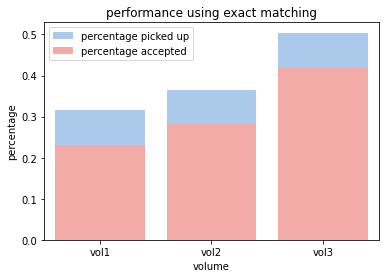

In [155]:
pick_up_rates = [vol1_wcvp_df_simplified.shape[0]/vol1_df.shape[0],
                 vol2_wcvp_df_simplified.shape[0]/vol2_df.shape[0],
                 vol3_wcvp_df_simplified.shape[0]/vol3_df.shape[0]]
accepted_rate = [(vol1_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol1_df.shape[0],
                 (vol2_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol2_df.shape[0],
                 (vol3_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol3_df.shape[0]]

ax = plt.subplots()

pastel_blue = sns.color_palette("pastel")[0]
pastel_red = sns.color_palette("pastel")[3]

ax = sns.barplot(x=['vol1', 'vol2', 'vol3'], y=pick_up_rates, color=pastel_blue, label = 'percentage picked up')
ax = sns.barplot(x=['vol1', 'vol2', 'vol3'], y=accepted_rate, color=pastel_red, label = 'percentage accepted')

ax.set(xlabel="volume", ylabel="percentage", title = "performance using exact matching")

plt.legend()
plt.show()